In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [58]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
from os import path
import pandas as pd
path = '/content/drive/MyDrive/python/college_student_placement/college_student_placement_dataset.csv'
df = pd.read_csv(path)

In [60]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [61]:

print(df.tail())

     College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
9995                    No                       1                     8   
9996                    No                       0                     7   
9997                   Yes                       3                     9   
9998                    No                       7                     5   
9999                    No                       3                     5   

      Projects_Completed Placement  
9995                   0       Yes  
9996                   2        No  
9997             

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [63]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [64]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [65]:
df['Internship_Experience'].value_counts()

,count
Internship_Experience,
No,6036
Yes,3964


In [66]:
df = df.drop(['College_ID'], axis=1)

In [67]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


# 6. Conduct Univariate Analysis on all variables with visualizations.

Numeric Histogram , Boxplot || Categorical Countplot or Barplot

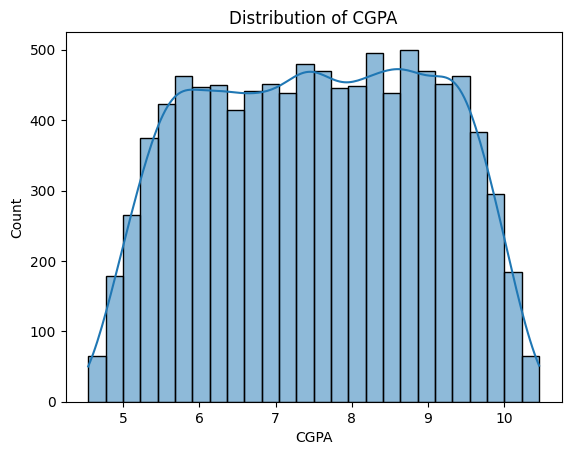

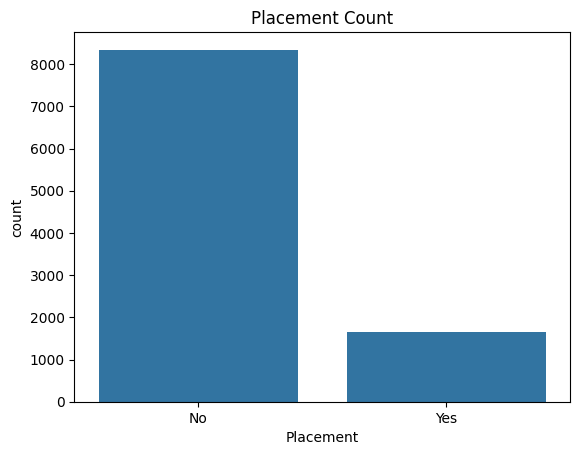

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.show()

# Categorical
sns.countplot(x='Placement', data=df)
plt.title('Placement Count')
plt.show()

# repeated for each col

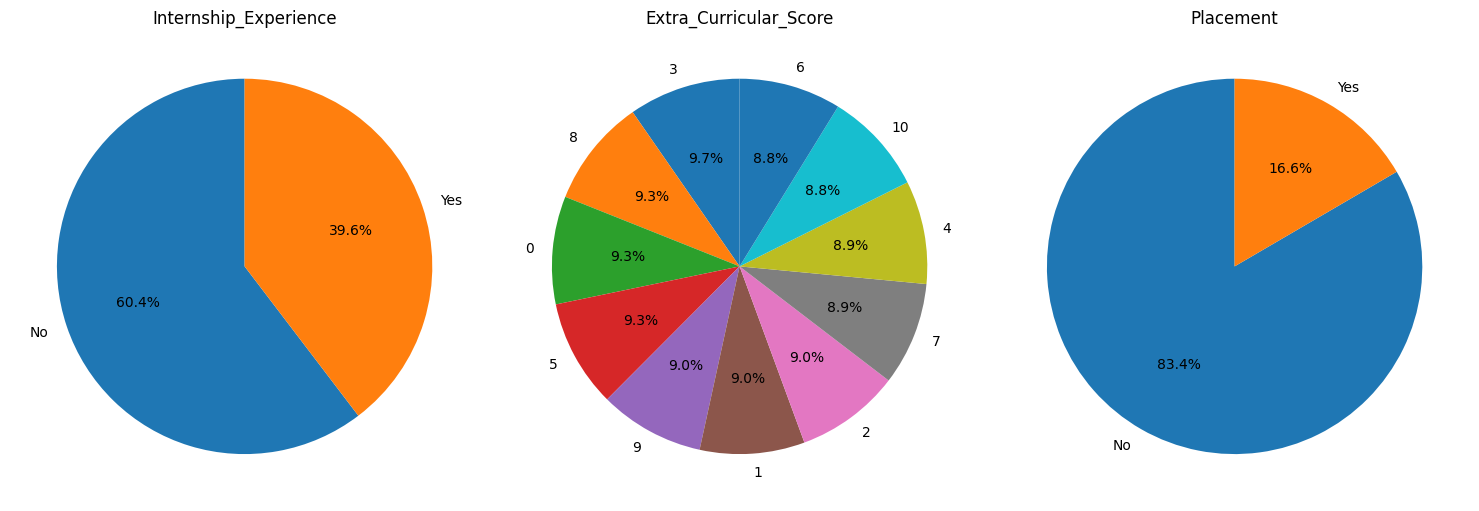

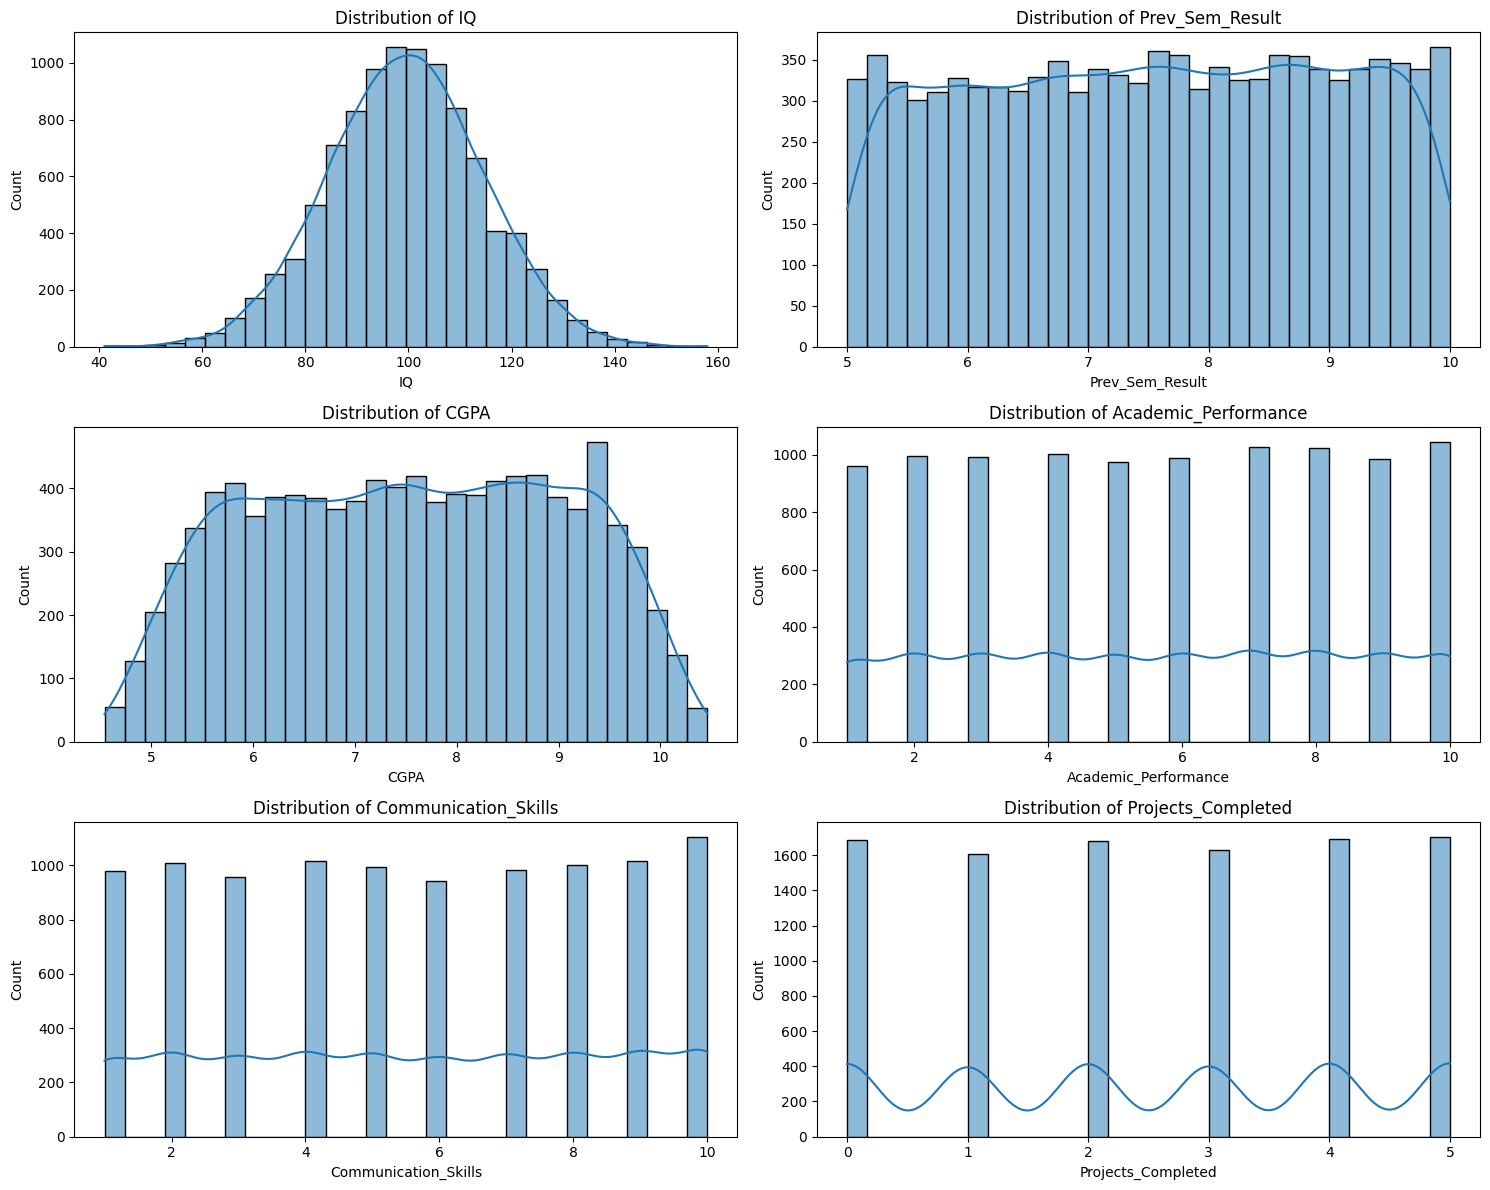

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# List columns by type
categorical_cols = ['Internship_Experience', 'Extra_Curricular_Score', 'Placement']
numerical_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Communication_Skills', 'Projects_Completed']

# Plot categorical columns (Pie Charts)
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Plot numerical columns (Histograms with KDE)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Insights from Univariate Analysis

•	Internship Experience:

Around 60% of students did not have internship experience, while 40% had.

→ Indicates limited exposure to work experience.

•	Extra Curricular Score:

Fairly even distribution across all scores from 0 to 10.

→ No clear trend; most students participated at similar levels.

•	Placement:

Only 16.6% of students were placed, while 83.4% were not.

→ Imbalanced outcome, which may affect model performance.

•	IQ:

Follows a normal distribution, centered around 100.

→ Indicates consistent cognitive ability in the dataset.
•	Prev_Sem_Result & CGPA:

Both are evenly spread, slight skew towards higher scores.

→ Suggests overall good academic standing.

•	Academic_Performance, Communication_Skills, Projects_Completed:

All show uniform distribution, meaning students vary across all levels.

→ These features may help distinguish outcomes later.


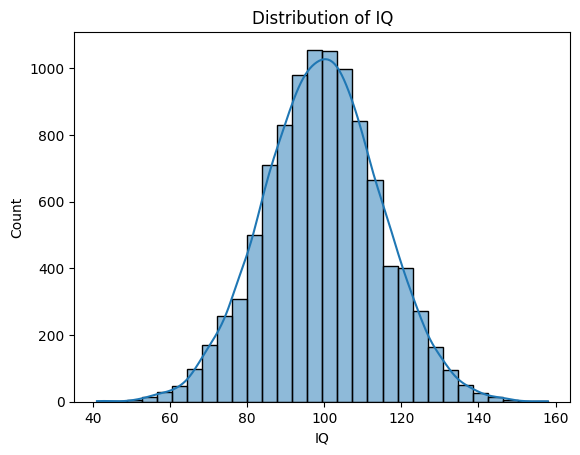

In [70]:
# 1
sns.histplot(df['IQ'], bins=30, kde=True)
plt.title("Distribution of IQ")
plt.xlabel("IQ")
plt.ylabel("Count")
plt.show()


# Univariate Analysis with Plots for All Columns


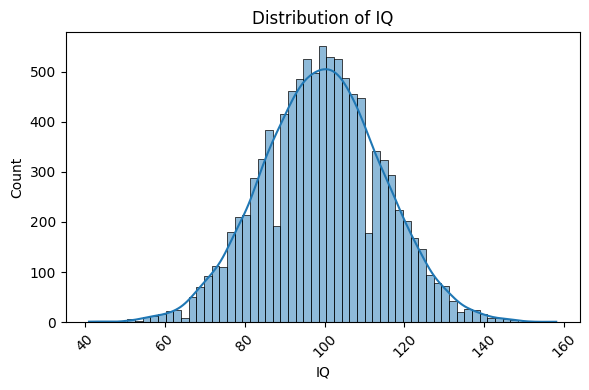

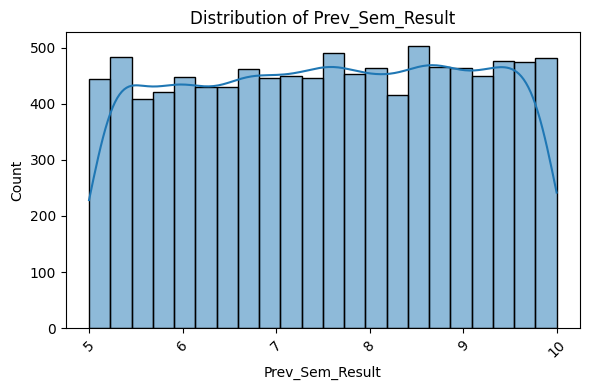

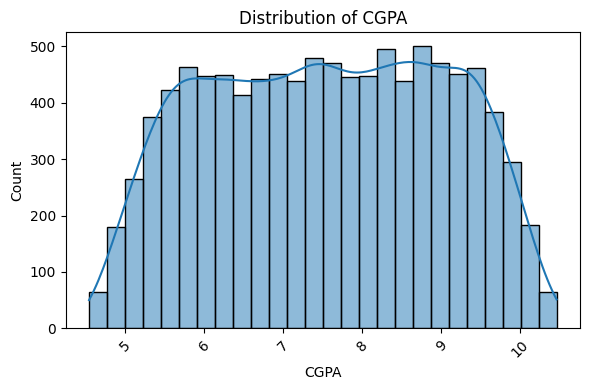

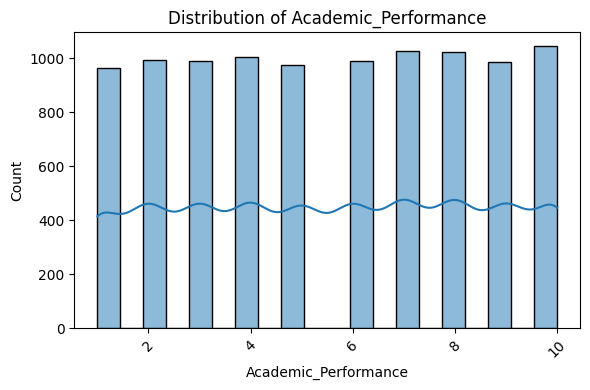

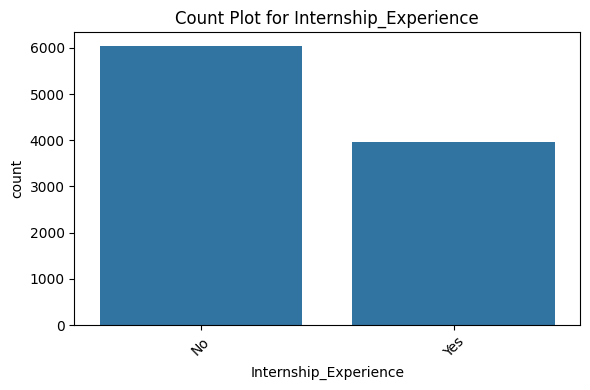

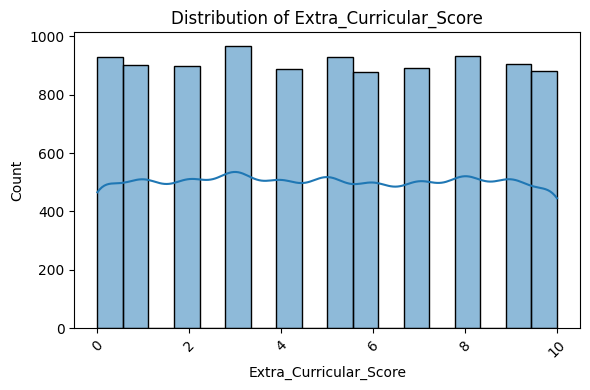

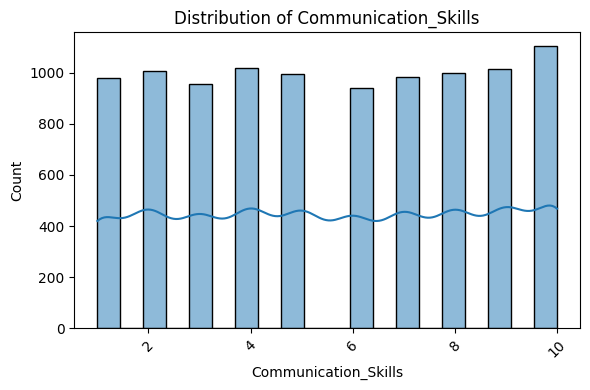

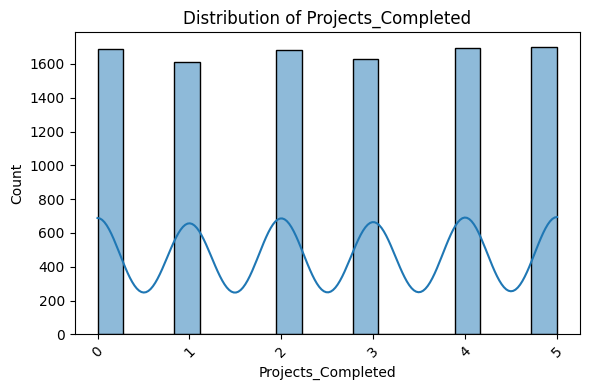

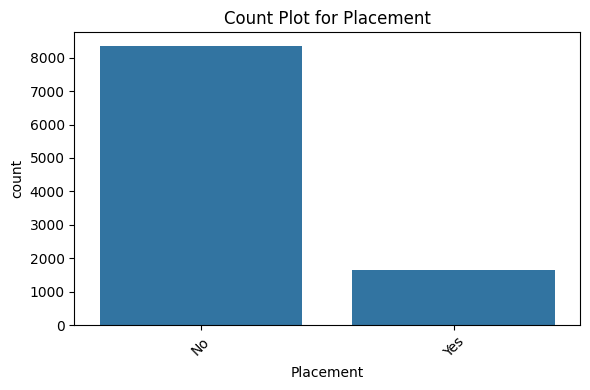

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.title(f'Count Plot for {col}')
    else:
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7. Outlier Detection using Tukey Method (IQR Method)


In [72]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers: {len(outliers)}")

IQ → Outliers: 61
Prev_Sem_Result → Outliers: 0
CGPA → Outliers: 0
Academic_Performance → Outliers: 0
Extra_Curricular_Score → Outliers: 0
Communication_Skills → Outliers: 0
Projects_Completed → Outliers: 0


In [73]:
# Calculate IQR for IQ
Q1 = df['IQ'].quantile(0.25)
Q3 = df['IQ'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['IQ'] >= lower_bound) & (df['IQ'] <= upper_bound)]

In [74]:
print(df.shape)

(9939, 9)


In [75]:
print(df.columns)

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')


# Bivariate Analysis (Hypothesis Testing)

## 1-  Chi-square test (categorical vs categorical)

In [76]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['Internship_Experience'], df['Placement'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Show results
print("Chi2 value:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship between Internship Experience and Placement.")
else:
    print("❌ No significant relationship between Internship Experience and Placement.")

Chi2 value: 0.22802788250383893
p-value: 0.632989995096702
❌ No significant relationship between Internship Experience and Placement.


Interpretation
There is no statistically significant relationship between having internship experience and being placed.

In simple terms: internship experience does not seem to affect placement outcome in my dataset (at a 95% confidence level).

## Correlation analysis (numeric vs numeric)

Correlation Matrix:
                               IQ  Prev_Sem_Result      CGPA  \
IQ                      1.000000        -0.003299 -0.003320   
Prev_Sem_Result        -0.003299         1.000000  0.980751   
CGPA                   -0.003320         0.980751  1.000000   
Academic_Performance   -0.009726        -0.005173 -0.002350   
Extra_Curricular_Score -0.009101         0.008712  0.010709   
Communication_Skills   -0.013168        -0.017338 -0.018294   
Projects_Completed      0.016550         0.018109  0.020364   

                        Academic_Performance  Extra_Curricular_Score  \
IQ                                 -0.009726               -0.009101   
Prev_Sem_Result                    -0.005173                0.008712   
CGPA                               -0.002350                0.010709   
Academic_Performance                1.000000                0.011118   
Extra_Curricular_Score              0.011118                1.000000   
Communication_Skills               -0.0195

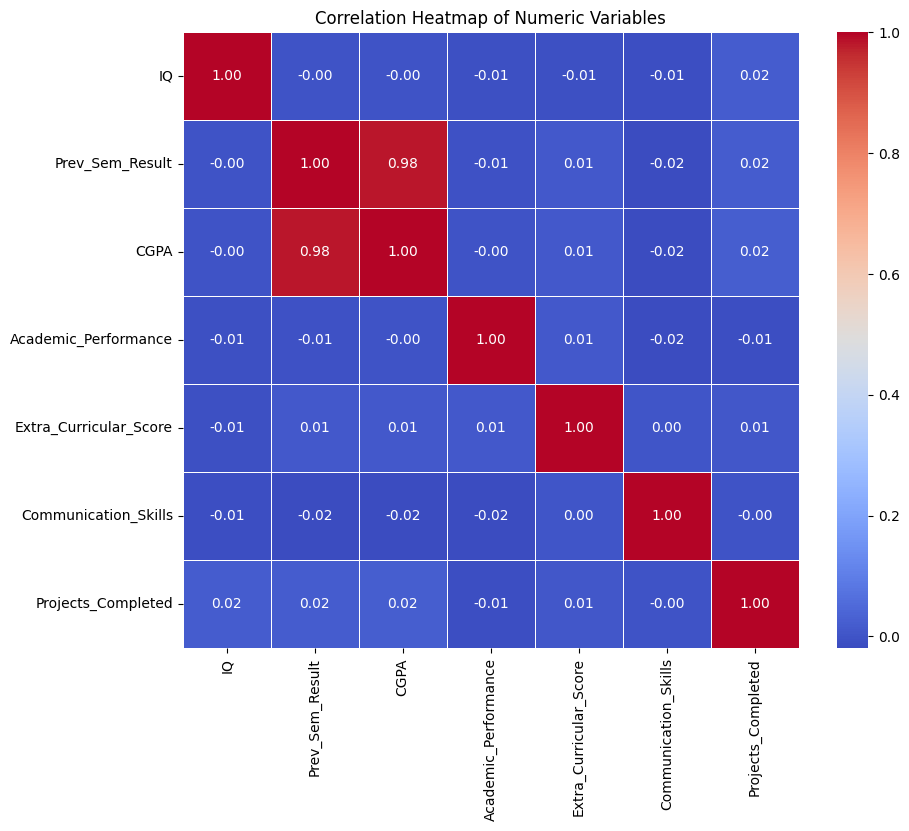

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**Correlation Matrix Interpretation**:
Prev_Sem_Result and CGPA have a very strong positive correlation (0.98)
→ This suggests multicollinearity — they carry almost the same information

All other numeric variables show very weak or no correlation (close to 0)



## 2-  T-test or ANOVA

**Is there a significant difference in CGPA between students who were Placed and those who were Not Placed**?




In [78]:
from scipy.stats import ttest_ind

# Split the data into two groups
placed = df[df['Placement'] == 'Yes']['CGPA']
not_placed = df[df['Placement'] == 'No']['CGPA']

# Perform the T-test (Welch’s test for unequal variances)
t_stat, p_val = ttest_ind(placed, not_placed, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in CGPA between Placed and Not Placed students.")
else:
    print("❌ No significant difference in CGPA between Placed and Not Placed students.")

T-statistic: 39.106711964789945
P-value: 1.3628747152021282e-266
✅ Significant difference in CGPA between Placed and Not Placed students.


In [79]:
print(df.columns)

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')


-If p-value < 0.05 → There is a statistically significant difference in CGPA

If p-value ≥ 0.05 → There’s no significant difference

# Next Step: Data Preparation
## 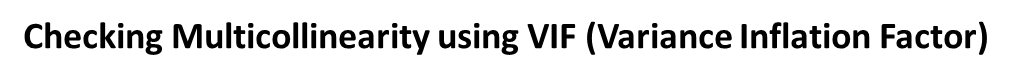

Select numeric features only

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the numeric features
X = df[['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
        'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']]

# Add constant
X = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                  Feature        VIF
0                   const  87.179049
1                      IQ   1.000638
2         Prev_Sem_Result  26.237610
3                    CGPA  26.241196
4    Academic_Performance   1.001027
5  Extra_Curricular_Score   1.000475
6    Communication_Skills   1.000930
7      Projects_Completed   1.001051


| VIF value | Meaning                                                            |
| --------- | ------------------------------------------------------------------ |
| 1–5       | Acceptable                                                         |
| > 5       | Moderate multicollinearity – watch out                             |
| > 10      | Serious multicollinearity – consider removing one of the variables |


Prev_Sem_Result and CGPA have serious multicollinearity (VIF > 10)

They are likely very similar, which we already saw before in  correlation matrix (correlation ≈ 0.98)

# for SMOTE

## 1-Drop Prev_Sem_Result (due to multicollinearity with CGPA)

In [81]:
model_df = df.copy()
model_df = model_df.drop(columns=['Prev_Sem_Result'])

## 2- Encode categorical columns (e.g. Placement, Internship_Experience)


In [82]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
encoded_df = model_df.copy()

# Initialize encoder
le = LabelEncoder()

# Encode 'Placement' column
encoded_df['Placement'] = le.fit_transform(encoded_df['Placement'])  # Yes → 1, No → 0

# Encode 'Internship_Experience' column
encoded_df['Internship_Experience'] = le.fit_transform(encoded_df['Internship_Experience'])  # Yes → 1, No → 0

In [83]:
encoded_df.head()

,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.28,8,0,8,8,4,0
1,97,5.37,8,0,7,8,0,0
2,109,5.83,9,0,3,1,1,0
3,122,5.75,6,1,1,6,1,0
4,96,7.69,7,0,8,10,2,0


## 3- Split the data into training and testing sets

In [84]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = encoded_df.drop('Placement', axis=1)
y = encoded_df['Placement']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Apply SMOTE



In [85]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply only to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

before and after Synthetic Minority **Over-sampling Technique** not Under-sampling


In [86]:
# Before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# After SMOTE
print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
Placement
0    5807
1    1150
Name: count, dtype: int64

After SMOTE:
Placement
0    5807
1    5807
Name: count, dtype: int64


SMOTE worked successfully and created a balanced training set, which will help improve model performance and reduce bias toward the majority class.


In my case:

•	Not Placed class = 5807 samples
•	Placed class = 1150 samples

If I had used under-sampling, I would have had to delete thousands of “Not Placed” students — which means:

I would lose real and potentially useful information.

✅ So I chose SMOTE (Over-sampling) to:

•	Generate new (synthetic) "Placed" samples

•	Keep all original data intact

•	Balance the dataset without deleting any valuable records.

# Scaling Code (with StandardScaler)

In [87]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the SMOTE training data
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the original test data using the same scaler
X_test_scaled = scaler.transform(X_test)

•	Use fit_transform() only on X_train_smote
👉 This calculates the mean and standard deviation, and scales the data accordingly.
•	Use transform() only on X_test
👉 This applies the same scaling (from training data) to the test data — without recalculating anything new.

Display

In [88]:
import pandas as pd

# Convert the scaled numpy array back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_smote.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Show first 5 rows
X_train_scaled_df.head()


,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,-0.206163,-0.850942,-0.140543,-0.661748,0.049051,-1.815763,0.157168
1,-2.224651,0.778727,1.266885,1.511150,0.369094,-0.441486,-1.803468
2,1.096087,1.352654,0.211314,1.511150,-1.231123,0.245652,1.464259
3,0.705412,-1.056422,-1.196114,-0.661748,-0.591036,-0.097917,-1.803468
4,0.314737,-0.128220,-0.140543,-0.661748,-0.270993,-0.097917,-0.496377


Now  both small negative and positive numbers like: -0.20, 1.09, -1.81, 0.24, etc.

This means that each column was scaled using the formula: (value − mean) ÷ standard deviation

Now all columns are on the same scale, which helps the model treat each feature fairly during training.



# **Modeling – Classification**:::

---

## model 1  Train Logistic Regression



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train_smote)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0      0.970     0.833     0.896      2489
           1      0.508     0.870     0.641       493

    accuracy                          0.839      2982
   macro avg      0.739     0.852     0.769      2982
weighted avg      0.894     0.839     0.854      2982



# model 2  Decision Tree



In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train_smote)

# Predict on test data
y_pred_tree = dtree.predict(X_test_scaled)

# Evaluate
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_tree, digits=3))

🔹 Accuracy: 0.9949698189134809

🔹 Confusion Matrix:
 [[2474   15]
 [   0  493]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.994     0.997      2489
           1      0.970     1.000     0.985       493

    accuracy                          0.995      2982
   macro avg      0.985     0.997     0.991      2982
weighted avg      0.995     0.995     0.995      2982



The Decision Tree achieved 99.5% accuracy, with perfect recall (100%) for placed students and 97% precision. The overall performance is excellent (F1-score = 0.991), but results may indicate overfitting, as the model performs almost too perfectly.

**Logistic Regression:**  Balanced, realistic performance; good recall but low precision for placed students.

**Decision Tree:** Outstanding scores across all metrics — but likely overfitting due to nearly perfect results.

# Modeling – Regression

---



### ✅ Step 1: **Select a continuous target**

From my dataset, good options for regression target are:

* `CGPA` ✅
* `IQ`
* `Academic_Performance`
  ...etc.

➡️ i Decided for  **`CGPA`** — it’s clean, continuous, and commonly used.

---

### ✅ Step 2: Prepare features and target

I'll now:

1. Drop `CGPA` from the features and make it the target
2. Use the **scaled data** I already prepared
3. Use **X\_train\_scaled** and **X\_test\_scaled** as inputs


## Linear Regression

# encoding numerical, then drop the  highly collinear
## Step 1: Prepare the Data

## Creates a copy of the original DataFrame
✅ Encodes the binary columns

✅ Drops the multicollinear column (Prev_Sem_Result)

✅ Prepares X and y for regression

In [91]:
# Step 1: Copy the original dataframe
df_regression = df.copy()

# Step 2: Binary encode Internship_Experience and Placement
df_regression['Internship_Experience'] = df_regression['Internship_Experience'].map({'Yes': 1, 'No': 0})
df_regression['Placement'] = df_regression['Placement'].map({'Yes': 1, 'No': 0})

# Step 3: Define features (drop multicollinear column)
X = df_regression.drop(columns=['Prev_Sem_Result'])

# Step 4: Define target (CGPA)
y = df_regression['CGPA']

# Optional: display to check
display(X.head())
display(y.head())


,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.28,8,0,8,8,4,0
1,97,5.37,8,0,7,8,0,0
2,109,5.83,9,0,3,1,1,0
3,122,5.75,6,1,1,6,1,0
4,96,7.69,7,0,8,10,2,0


,CGPA
0,6.28
1,5.37
2,5.83
3,5.75
4,7.69


# try VIF 1st

In [92]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Copy and Encode
df_vif = df.copy()
df_vif['Internship_Experience'] = df_vif['Internship_Experience'].map({'Yes': 1, 'No': 0})
df_vif['Placement'] = df_vif['Placement'].map({'Yes': 1, 'No': 0})

# Step 2: Drop the target column (CGPA)
X_vif = df_vif.drop(columns=['CGPA'])

# Step 3: Calculate VIF
X_vif_df = pd.DataFrame(X_vif, columns=X_vif.columns)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_df.values, i) for i in range(X_vif_df.shape[1])]

display(vif_data)

,feature,VIF
0,IQ,22.079842
1,Prev_Sem_Result,19.502074
2,Academic_Performance,4.561586
3,Internship_Experience,1.646559
4,Extra_Curricular_Score,3.408343
5,Communication_Skills,4.719822
6,Projects_Completed,3.172621
7,Placement,1.401052


# drop

In [93]:
X = df_regression.drop(columns=['CGPA', 'IQ', 'Prev_Sem_Result'])
y = df_regression['CGPA']
print(X.head())
print(y.head())

   Academic_Performance  Internship_Experience  Extra_Curricular_Score  \
0                     8                      0                       8   
1                     8                      0                       7   
2                     9                      0                       3   
3                     6                      1                       1   
4                     7                      0                       8   

   Communication_Skills  Projects_Completed  Placement  
0                     8                   4          0  
1                     8                   0          0  
2                     1                   1          0  
3                     6                   1          0  
4                    10                   2          0  
0    6.28
1    5.37
2    5.83
3    5.75
4    7.69
Name: CGPA, dtype: float64


Successfully dropped the two features with high multicollinearity based on the VIF values:

**IQ (VIF ≈ 22)**

Prev_Sem_Result (VIF ≈ 19.5)

## 1 - Step: Split the data into train & test sets

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### 2 Step: Scale the features

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model 1  Linear *Regression*

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # manually take square root
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print
print("🔹 R²:", round(r2, 3))
print("🔹 Adjusted R²:", round(adj_r2, 3))
print("🔹 RMSE:", round(rmse, 3))

🔹 R²: 0.11
🔹 Adjusted R²: 0.107
🔹 RMSE: 1.395


##  p-values using statsmodels.

In [97]:
import statsmodels.api as sm

# Add constant term for intercept
X_train_const = sm.add_constant(X_train_scaled)

# Fit OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Show p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     191.9
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          4.60e-229
Time:                        00:09:20   Log-Likelihood:                -13790.
No. Observations:                7951   AIC:                         2.759e+04
Df Residuals:                    7944   BIC:                         2.764e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5295      0.015    489.563      0.0

# another liner resgrassion after P value

In [98]:
X = df_regression[['Academic_Performance', 'Communication_Skills', 'Projects_Completed', 'Placement']]
y = df_regression['CGPA']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R²:", round(r2, 3))
print("Adjusted R²:", round(adj_r2, 3))
print("RMSE:", round(rmse, 3))

R²: 0.113
Adjusted R²: 0.111
RMSE: 1.393


  **Feature Selection**

•	Used p-values from OLS to remove insignificant variables (p > 0.05).
•	Kept only statistically significant features.

   **Model Re-training**

•	Re-split, scaled, and trained Linear Regression on cleaned data.
•	R²: 0.113, Adj. R²: 0.111, RMSE: 1.393 → Weak predictive power.

   **Conclusion**
   
•	Feature filtering simplified the model but performance stayed low.
•	Suggest trying a non-linear model next.

Step 1: Predict on training data and get residuals

In [102]:
# Predict on training data
y_train_pred = lr.predict(X_train_scaled)

# Calculate residuals
residuals = y_train - y_train_pred

 Step 2: Linearity & Equal Variance (Homoscedasticity)
Residuals vs Predicted Plo

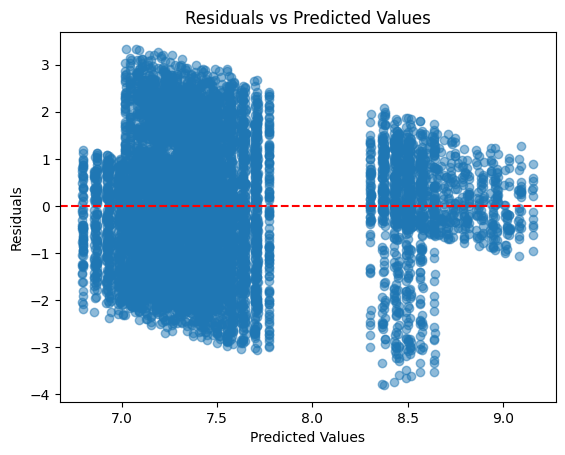

In [103]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

Sure! Here's a short version for your PPT slide:

---

###  Residual Plot Insight

* Residuals show **heteroscedasticity** and **non-linearity**.

* Linear Regression **violates LINE assumptions**.

###  Recommendation

Use **Regression Tree models** (e.g., Decision Tree, Random Forest) for better accuracy.


 Step 3: Normality
Histogram + Q-Q Plot of residuals

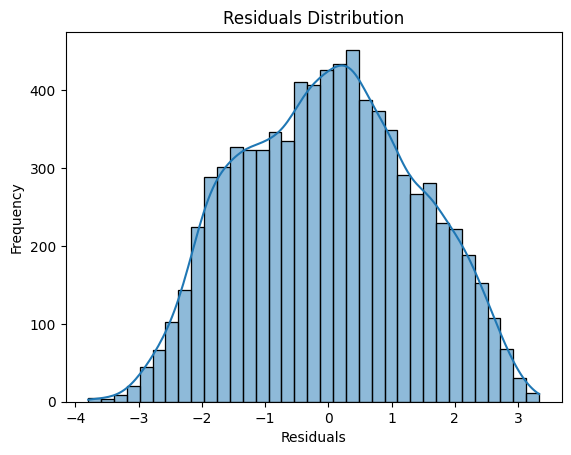

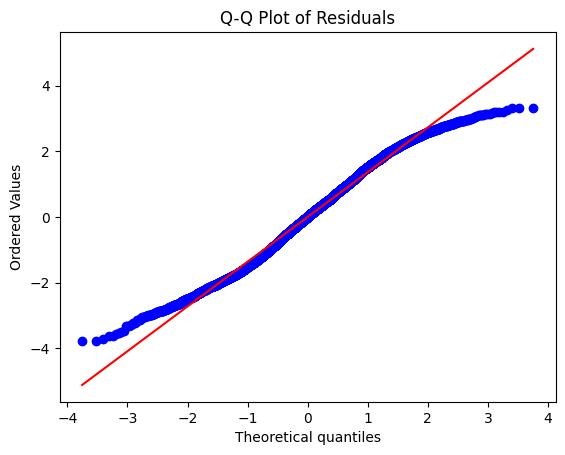

In [104]:
import seaborn as sns
import scipy.stats as stats

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

###  Residual Normality Check (for PPT)

* **Histogram**: Roughly bell-shaped → residuals are **close to normal**.

* **Q-Q Plot**: Some deviations at the ends → **minor normality issues**.

*  Overall: Normality assumption is **mostly satisfied**.



In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

# Predict
y_pred_tree = tree.predict(X_test_scaled)

# Evaluate
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print("🔹 R²:", round(r2_tree, 3))
print("🔹 RMSE:", round(rmse_tree, 3))

🔹 R²: 0.053
🔹 RMSE: 1.439


# PCA

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 5: Predict & Evaluate
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Step 6: Output
print("🔹 R²:", round(r2, 3))
print("🔹 Adjusted R²:", round(adj_r2, 3))
print("🔹 RMSE:", round(rmse, 3))
print("🔸 PCA Components used:", pca.n_components_)

🔹 R²: 0.113
🔹 Adjusted R²: 0.111
🔹 RMSE: 1.393
🔸 PCA Components used: 4


# XGBoost Regression

In [107]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Split again if needed (on PCA-reduced data or original)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 2. Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# 3. Predict & Evaluate
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 4. Output
print("🔹 R²:", round(r2, 3))
print("🔹 Adjusted R²:", round(adj_r2, 3))
print("🔹 RMSE:", round(rmse, 3))

🔹 R²: 0.065
🔹 Adjusted R²: 0.063
🔹 RMSE: 1.43


## Polynomial Features

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Split again (لو مش متقسم قبل كده)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Apply Polynomial Features (مثلاً درجة 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Train Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 4. Predict & Evaluate
y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n = X_test_poly.shape[0]
p = X_test_poly.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 5. Print Results
print("🔹 R²:", round(r2, 3))
print("🔹 Adjusted R²:", round(adj_r2, 3))
print("🔹 RMSE:", round(rmse, 3))

🔹 R²: 0.123
🔹 Adjusted R²: 0.117
🔹 RMSE: 1.385
